In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn import metrics

In [5]:
train=pd.read_csv("train.csv")
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

(2000, 21)

In [6]:
test=pd.read_csv("test.csv")
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

(1000, 21)

In [13]:
#clean data
train.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
train.duplicated().sum()

0

In [8]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [16]:
test.duplicated().sum()

0

In [18]:
#data analysis
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [19]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [21]:
#dropping id in test data frame
test=test.drop(['id'],axis=1)

In [22]:
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


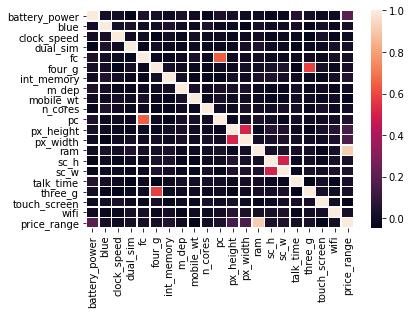

In [34]:
corr = train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=.5)

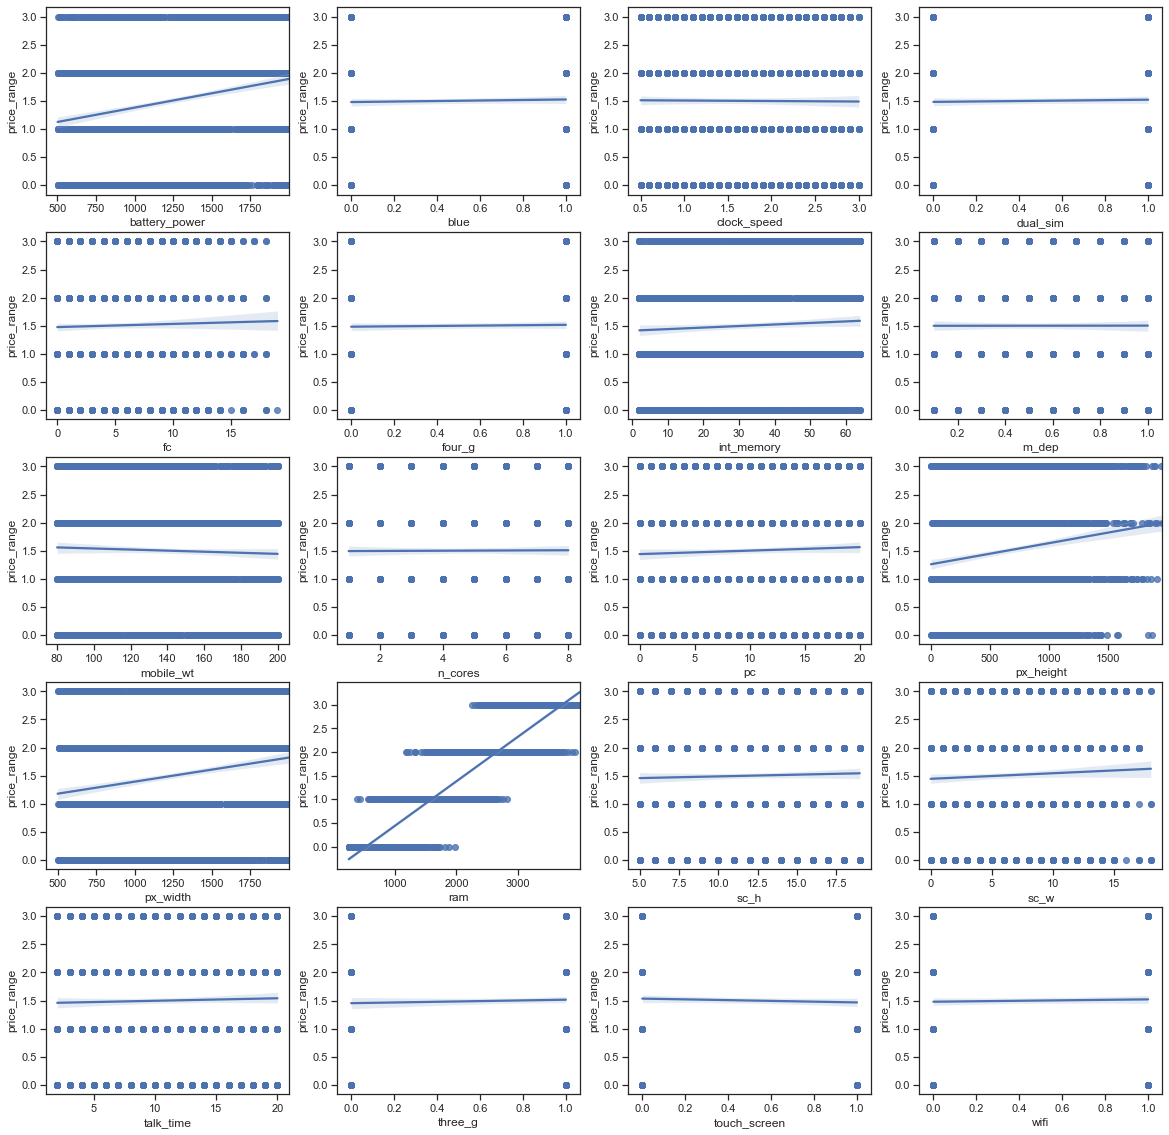

In [86]:
fig ,axis = plt.subplots(nrows=5,ncols=4,figsize=(20,20))
count=0
for i in range(5):
    for j in range(4):
        sns.regplot(x=train.iloc[:,count],y='price_range',data=train, ax=axis[i,j])
        count+=1

In [92]:
# from the above graphs we can conclude that battery power, init memory,fc,mobile wt,px_width,px_height,ram provides difference much than others
final=train[['battery_power','int_memory','fc','mobile_wt','px_width','px_height','ram','price_range']]

In [93]:
final.head()

,battery_power,int_memory,fc,mobile_wt,px_width,px_height,ram,price_range
0,842,7,1,188,756,20,2549,1
1,1021,53,0,136,1988,905,2631,2
2,563,41,2,145,1716,1263,2603,2
3,615,10,0,131,1786,1216,2769,2
4,1821,44,13,141,1212,1208,1411,1


In [101]:
final['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [107]:
x=final.iloc[:,:-1]
y=final.iloc[:,-1]
#x_test=test[['battery_power','int_memory','fc','mobile_wt','px_width','px_height','ram']]

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_columns=x.columns
print('x_train and x_test shape',x_train.shape,'&',x_test.shape)
print('y_train and y_test shape',y_train.shape,'&',y_test.shape)

x_train and x_test shape (1400, 7) & (600, 7)
y_train and y_test shape (1400,) & (600,)


In [111]:
# normalizing the dataset
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.12296692,  1.52550835, -0.53135368, ...,  1.37629126,
         1.57184744, -0.63459027],
       [ 0.6169352 , -0.29441846, -0.99440699, ...,  1.31197705,
        -1.01377859, -0.87077097],
       [-0.21936458,  0.36737311, -0.99440699, ..., -1.00792835,
        -0.53813161, -1.00975422],
       ...,
       [-1.2118962 , -0.12897057, -0.76288034, ..., -0.55543195,
         0.05924494, -0.46290508],
       [ 0.63761294, -1.17680722,  0.39475295, ...,  0.8434021 ,
        -1.09944014, -1.27500331],
       [ 0.63531542, -0.23926917, -0.06830036, ..., -0.10982636,
         0.71297777, -0.67455931]])

In [112]:
#logistic regression
model = LogisticRegression(solver = 'lbfgs')
model.fit(x_train, y_train)

LogisticRegression()

In [138]:
# use the model to make predictions with the test data
print("Logistic Regression")
y_pred = model.predict(x_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Logistic Regression
Misclassified samples: 30
Accuracy:  0.95


In [124]:
#naive bayes
nb=GaussianNB()
nb.fit(x_train,y_train) 
y_predictions=nb.predict(x_test)
wrong_classified = (y_test != y_predictions).sum()
acc = metrics.accuracy_score(y_test,y_predictions)
print("Naive bayes accuracy: ",acc)
print('Misclassified samples: ',wrong_classified)

Naive bayes accuracy:  0.785
Misclassified samples:  129


In [125]:
#random forest classifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
wrong = (y_test != y_predictions).sum()
print("Random Forest Classifier ")
print("Misclassified samples: ",wrong)
rfcacc = metrics.accuracy_score(y_test,y_predict)
print("accuracy: ",rfcacc)

Random Forest Classifier 
Misclassified samples:  129
accuracy:  0.8883333333333333


In [137]:
#kmeans algorithm
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_train)
ypred_k=kmeans.predict(x_test)
wrong_k = (y_test != ypred_k).sum()
print("Random Forest Classifier ")
print("Misclassified samples: ",wrong_k)

Random Forest Classifier 
Misclassified samples:  466
